# Selección de portafolios usando simulación Montecarlo

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Separation_theorem_of_MPT.svg/2000px-Separation_theorem_of_MPT.svg.png" width="400px" height="400px" />

> Durante el curso, específicamente en los módulos dos y tres, elaboramos toda la fundamentación de la teoría moderna de portafolios de Markowitz. Ésta se basa en la existencia de una línea especial en el espacio de rendimiento esperado vs. volatilidad, llamada **frontera de mínima varianza**.

> Al finalizar el módulo 3, vimos que no importa la cantidad de activos riesgosos que se tengan, si encontramos dos portafolios sobre la frontera eficiente, podemos reconstruirla. Dos portafolios importantes que hallamos en el curso fueron:

> - **Portafolio de mínima varianza**: minimizando la varianza.
> - **Portafolio eficiente en media varianza**: maximizando el radio de Sharpe.

> Por otra parte, resolver problemas de optimización cuando la cantidad de variables crece, se vuelve un problema complejo, computacionalmente hablando. Así que desarrollar métodos alternativos a la optimización que nos permitan encontrar los anteriores portafolios es de gran interés...

## 1. Descargamos activos de la BMV

Por simplicidad, y para entender las ideas alrededor de la selección de portafolios usando simulación montecarlo, utilizaremos únicamente tres activos de la BMV: 
- Grupo México(AMXL.MX)
- Walmart de Mexico SAB de CV	(WALMEX.MX) 
- BIMBO (BIMBOA.MX)
- Banorte (GFBANORTEO.MX)

1.1. Descargar precios mensuales ajustados en el cierre para los tres activos mencionados anteriormente en los últimos 5 años:

In [1]:
# Bajamos los ETF de yahoo
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

tickers = ['GMEXICOB.MX', 'WALMEX.MX', 'GFNORTEO.MX', 'BIMBOA.MX']
start_date = '2015-01-01'


St = yf.download(tickers, start=start_date)['Close']
St.head()
rt = St.pct_change().dropna()


[*********************100%%**********************]  4 of 4 completed


In [2]:
St 

,BIMBOA.MX,GFNORTEO.MX,GMEXICOB.MX,WALMEX.MX
Date,,,,
2015-01-02,39.770000,78.830002,42.180000,30.760000
2015-01-05,39.709999,76.599998,40.529999,29.830000
2015-01-06,39.419998,75.860001,40.689999,30.129999
2015-01-07,40.389999,77.500000,41.590000,30.610001
2015-01-08,41.020000,78.669998,42.160000,30.420000
...,...,...,...,...
2023-10-23,74.900002,143.259995,74.739998,60.299999
2023-10-24,73.760002,145.600006,74.830002,60.009998
2023-10-25,75.290001,148.000000,76.809998,60.470001


1.2. A partir de los precios, obtener los rendimientos mensuales:

1.3. Finalmente, a partir de los rendimientos mensuales, estimar la tendencia central de los rendimientos (rendimiento esperado), y caracterizar el riesgo de los activos (varianzas y covarianzas)

In [4]:
# Matriz de covarianza
rt.corr()
sigma = rt.cov() 

In [5]:
# Tasa libre de riesgo
rf = 0.1125

¿Alguien tiene alguna idea de lo que es simulación montecarlo?

En cuanto a la selección de portafolios, lo que hacemos es simular una gran cantidad de posibles portafolios que se pueden construir con los activos dados (generamos muchas ponderaciones posibles), y calculamos su rendimiento esperado y volatilidad para dibujarlos, y así poder identificar objetos de interés:

- frontera eficiente;
- portafolio de mínima varianza;
- portafolio EMV...

In [6]:
# Definimos el número de portafolios que simularemos, y la cantidad de activos que tenemos
# ¿cuantos portafolios?
# ¿cuantos actvos?
n_port = 10000
n_act = len(rt.keys())

In [7]:
len(rt.keys())

4

2.1. Generamos los portafolios

In [8]:
# w = np.random.dirichlet((1,) * n_act, size=1)
w = np.random.dirichlet((1,) * n_act, size = 1)
w

array([[0.18616228, 0.28285629, 0.1771161 , 0.35386533]])

In [9]:
# Volatility example
np.sqrt(w.dot(sigma).dot(w.T)[0][0]) * np.sqrt(252)

0.19983598044035264

In [10]:
rt.keys()

Index(['BIMBOA.MX', 'GFNORTEO.MX', 'GMEXICOB.MX', 'WALMEX.MX'], dtype='object')

In [11]:
# Expected value example 
w.dot(rt.mean())[0] * 252 

0.1193663734835792

In [12]:
# Generar una matriz de pesos de n_portafolios x n_activos,
# tal que cada fila sume uno (recordar restricción)
W = np.random.dirichlet((1,) * n_act, size = n_port)

In [13]:
# Verificamos la forma de W
W.shape

(10000, 4)

In [14]:
W

array([[0.21416489, 0.20552099, 0.41103321, 0.1692809 ],
       [0.1502377 , 0.17206483, 0.22666649, 0.45103098],
       [0.16807175, 0.13666273, 0.59036587, 0.10489965],
       ...,
       [0.27823997, 0.16477023, 0.28721047, 0.26977933],
       [0.07772832, 0.57755807, 0.24610398, 0.09860963],
       [0.40215588, 0.08385258, 0.02042659, 0.49356495]])

In [15]:
# Calcula el valor esperado
valores_esperados_markowitz = W.dot(rt.mean()) * 252 

$$E[P] = W * E[stocks_i] $$

In [16]:
# Rendimientos y volatilidad de cada portafolios
volatility_markowitz = []
for i in W: 
    variance = i.dot(sigma).dot(i.T)
    volatility = np.sqrt(variance) * np.sqrt(252)
    volatility_markowitz.append(volatility)
    

$$Var(P) = W^T \Sigma W $$
$$\sigma_p = \sqrt{Var(P)}$$

In [17]:
df = pd.DataFrame({
    'expected_value' : valores_esperados_markowitz, 
    'volatility' : volatility_markowitz
    
    })

df.head()

,expected_value,volatility
0,0.120274,0.217019
1,0.118825,0.196399
2,0.121247,0.244627
3,0.118836,0.229417
4,0.112183,0.273234


In [18]:
# ¿Cuanto en cada activo?

# 'GOOGL', 'EFX', 'COST', 'WMT', 'PG',
#      'DIS', 'IBM', 'AMZN', 'TGT', 'JPM', 'INTC',
#      'MSFT', 'BLK', 'NFLX'

df['W_GOOGL'] = [i[0] for i in W]
df['W_ETX'] = [i[1] for i in W]
df['W_COST'] = [i[2] for i in W]
df['W_WMT'] = [i[3] for i in W]
df['W_PG'] = [i[0] for i in W]
df['W_DIS'] = [i[1] for i in W]
df['W_IMB'] = [i[2] for i in W]
df['W_AMZN'] = [i[3] for i in W]
df['W_TGT'] = [i[0] for i in W]
df['W_JPM'] = [i[1] for i in W]
df['W_INTC'] = [i[2] for i in W]
df['W_MSFT'] = [i[3] for i in W]
df['W_BLK'] = [i[0] for i in W]
df['W_NFLX'] = [i[1] for i in W]

In [19]:
df

,expected_value,volatility,W_GOOGL,W_ETX,W_COST,W_WMT,W_PG,W_DIS,W_IMB,W_AMZN,W_TGT,W_JPM,W_INTC,W_MSFT,W_BLK,W_NFLX
0,0.120274,0.217019,0.214165,0.205521,0.411033,0.169281,0.214165,0.205521,0.411033,0.169281,0.214165,0.205521,0.411033,0.169281,0.214165,0.205521
1,0.118825,0.196399,0.150238,0.172065,0.226666,0.451031,0.150238,0.172065,0.226666,0.451031,0.150238,0.172065,0.226666,0.451031,0.150238,0.172065
2,0.121247,0.244627,0.168072,0.136663,0.590366,0.104900,0.168072,0.136663,0.590366,0.104900,0.168072,0.136663,0.590366,0.104900,0.168072,0.136663
3,0.118836,0.229417,0.435190,0.351806,0.196118,0.016886,0.435190,0.351806,0.196118,0.016886,0.435190,0.351806,0.196118,0.016886,0.435190,0.351806
4,0.112183,0.273234,0.882485,0.048330,0.062741,0.006444,0.882485,0.048330,0.062741,0.006444,0.882485,0.048330,0.062741,0.006444,0.882485,0.048330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.119407,0.218670,0.329976,0.392321,0.141893,0.135810,0.329976,0.392321,0.141893,0.135810,0.329976,0.392321,0.141893,0.135810,0.329976,0.392321
9996,0.118785,0.203631,0.065601,0.102662,0.251704,0.580033,0.065601,0.102662,0.251704,0.580033,0.065601,0.102662,0.251704,0.580033,0.065601,0.102662
9997,0.118518,0.200594,0.278240,0.164770,0.287210,0.269779,0.278240,0.164770,0.287210,0.269779,0.278240,0.164770,0.287210,0.269779,0.278240,0.164770
9998,0.123533,0.247819,0.077728,0.577558,0.246104,0.098610,0.077728,0.577558,0.246104,0.098610,0.077728,0.577558,0.246104,0.098610,0.077728,0.577558


In [20]:
df['sharpe'] = ( df.expected_value - rf) / df.volatility
df.head()

,expected_value,volatility,W_GOOGL,W_ETX,W_COST,W_WMT,W_PG,W_DIS,W_IMB,W_AMZN,W_TGT,W_JPM,W_INTC,W_MSFT,W_BLK,W_NFLX,sharpe
0,0.120274,0.217019,0.214165,0.205521,0.411033,0.169281,0.214165,0.205521,0.411033,0.169281,0.214165,0.205521,0.411033,0.169281,0.214165,0.205521,0.035820
1,0.118825,0.196399,0.150238,0.172065,0.226666,0.451031,0.150238,0.172065,0.226666,0.451031,0.150238,0.172065,0.226666,0.451031,0.150238,0.172065,0.032206
2,0.121247,0.244627,0.168072,0.136663,0.590366,0.104900,0.168072,0.136663,0.590366,0.104900,0.168072,0.136663,0.590366,0.104900,0.168072,0.136663,0.035757
3,0.118836,0.229417,0.435190,0.351806,0.196118,0.016886,0.435190,0.351806,0.196118,0.016886,0.435190,0.351806,0.196118,0.016886,0.435190,0.351806,0.027620
4,0.112183,0.273234,0.882485,0.048330,0.062741,0.006444,0.882485,0.048330,0.062741,0.006444,0.882485,0.048330,0.062741,0.006444,0.882485,0.048330,-0.001162


$$Sharpe = \frac{E_s - rf}{\sigma_s}$$

In [21]:
# Radio de Sharpe
df_max_sharpe = df[df.sharpe == df.sharpe.max() ]
df_max_sharpe

,expected_value,volatility,W_GOOGL,W_ETX,W_COST,W_WMT,W_PG,W_DIS,W_IMB,W_AMZN,W_TGT,W_JPM,W_INTC,W_MSFT,W_BLK,W_NFLX,sharpe
5548,0.124965,0.262639,0.001576,0.589074,0.35827,0.05108,0.001576,0.589074,0.35827,0.05108,0.001576,0.589074,0.35827,0.05108,0.001576,0.589074,0.047459


In [22]:
sharpe_maximo = df_max_sharpe.sharpe.values[0]
sharpe_maximo

0.047459077594828133

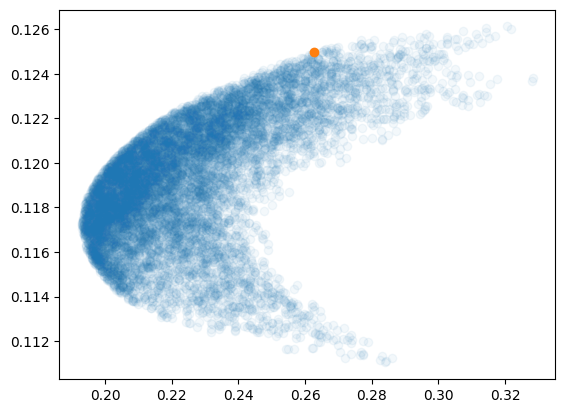

In [23]:
# Data frame de resultados
plt.scatter(df.volatility, df.expected_value, alpha = 0.05)
plt.scatter(df_max_sharpe.volatility, df_max_sharpe.expected_value)

# ¿Cuál es el mejor portafolio?

In [24]:
sharpe_maximo = df_max_sharpe.sharpe.values[0]
sharpe_maximo

0.047459077594828133

In [25]:
# Obten la LAC
volatility_portafolios = np.linspace(0, 0.5, 100)
lac = rf + sharpe_maximo * volatility_portafolios

Text(0.5, 1.0, 'Linea de asignacion de cpaitales, a mayor dinero en acciones, mas rendimiento')

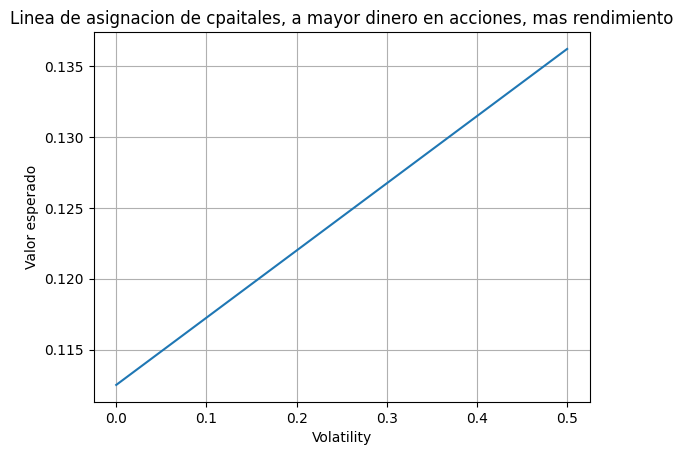

In [26]:
# Grafica LAC
plt.plot(volatility_portafolios, lac) 
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Valor esperado') 
plt.title('Linea de asignacion de cpaitales, a mayor dinero en acciones, mas rendimiento') 

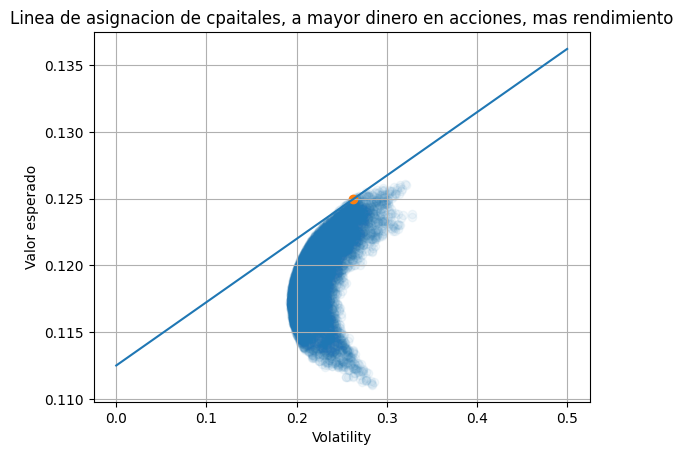

In [27]:
# Gráfica Markowitz + LAC
plt.plot(volatility_portafolios, lac) 
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Valor esperado') 
plt.title('Linea de asignacion de cpaitales, a mayor dinero en acciones, mas rendimiento') 
plt.scatter(df.volatility, df.expected_value, alpha = 0.05)
plt.scatter(df_max_sharpe.volatility, df_max_sharpe.expected_value)

$$w_{stocks} = \frac{e_{emv} - rf}{\sigma_{emv}^2 * \alpha} $$

In [28]:
e_emv = df_max_sharpe.expected_value.values[0]
s_emv = df_max_sharpe.volatility.values[0]

In [29]:
# ¿Cuanto invertir en cada una?
aversion = np.linspace(0, 10, 10) 
cuanto_va_en_cada_una = pd.DataFrame({
    'aversion' : aversion, 
    'cuanto_acciones' : (e_emv - rf) / (s_emv ** 2 * aversion) 
    
    })

cuanto_va_en_cada_una['cuanto_cetes'] = 1 - cuanto_va_en_cada_una['cuanto_acciones']
cuanto_va_en_cada_una

/tmp/ipykernel_51275/568402111.py:5: RuntimeWarning: divide by zero encountered in divide
  'cuanto_acciones' : (e_emv - rf) / (s_emv ** 2 * aversion)


,aversion,cuanto_acciones,cuanto_cetes
0,0.000000,inf,-inf
1,1.111111,0.162631,0.837369
2,2.222222,0.081315,0.918685
3,3.333333,0.054210,0.945790
4,4.444444,0.040658,0.959342
5,5.555556,0.032526,0.967474
6,6.666667,0.027105,0.972895
7,7.777778,0.023233,0.976767
8,8.888889,0.020329,0.979671
9,10.000000,0.018070,0.981930
